# Notebook for hysteresis loop analyses on anorthosite and diabase specimens

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Make hysteresis loops

In [8]:
# Hysteresis loops
# This function takes in an excel sheet, take in the index of the specimen you want, return dictionary of B field and sample moment and specimen name; 
# specimen_index starts from 0
def get_hyst_data(excel_sheet, specimen_index):
    Blist = excel_sheet.iloc[:,0 + specimen_index * 6].tolist()[5:] # field list, unit is mT
    Mlist = excel_sheet.iloc[:,1 + specimen_index * 6].tolist()[5:] # moment list, unit is Am2/kg
    Mflist = excel_sheet.iloc[:,2 + specimen_index * 6].tolist()[5:] # mf list, unit is Am2/kg
    Mlist_cor = excel_sheet.iloc[:,3 + specimen_index * 6].tolist()[5:] # corrected moment list, unit is Am2/kg
    Mflist_cor = excel_sheet.iloc[:,4 + specimen_index * 6].tolist()[5:] # corrected mf list, unit is Am2/kg
    # plotting derivatives of the backfield curve
    Der = np.diff(Mflist_cor)/np.diff(Blist)
    specimen_name = excel_sheet.columns[1 + specimen_index * 6]
    return {'Blist':Blist, 'Mlist':Mlist, 'Mflist':Mflist, 'Mlist_cor':Mlist_cor, 
            'Mflist_cor':Mflist_cor, 'derivative_list':Der, 'Name':specimen_name}

# plotting function directly output the plots as you specify the index of specimen in the list
def plot_hyst_data(excel_sheet, specimen_index, savefig = False):
    Blist = get_hyst_data(excel_sheet, specimen_index)['Blist']
    Mlist = get_hyst_data(excel_sheet, specimen_index)['Mlist']
    Mflist = get_hyst_data(excel_sheet, specimen_index)['Mflist']
    Mlist_cor = get_hyst_data(excel_sheet, specimen_index)['Mlist_cor']
    Mflist_cor = get_hyst_data(excel_sheet, specimen_index)['Mflist_cor']
    Der = get_hyst_data(excel_sheet, specimen_index)['derivative_list']
    specimen_name = get_hyst_data(excel_sheet, specimen_index)['Name']
    
    plt.figure(figsize=(8,6))
    plt.axhline(y=0, lw=1, color='k')
    plt.axvline(x=0, lw=1, color='k')
    plt.plot(Blist, Mlist_cor, color = 'red', label = 'M_cor')
    plt.plot(Blist, Mflist_cor, color = 'blue', label = 'Mf_cor')
        
    plt.xlabel('B (mT)')
    plt.ylabel('M (Am2/kg)')
    plt.title(specimen_name + ' hysteresis loop') 
    plt.grid()
    
    plt.legend()
    if savefig == True:
        plt.savefig(specimen_name + '_hysteresis loop.pdf')
    plt.show()
    return

In [9]:
# Loading IRM data file
rockmag_data = pd.ExcelFile('../Data/Rock_mag/2020_jan_IRM_export.xls')
hysteresis_measurements = pd.read_excel(rockmag_data, 'hysteresis measurements')

In [10]:
hysteresis_measurements

,specimen,AX1-1r,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,specimen.1,AX1-1r.1,Unnamed: 8,Unnamed: 9,...,BD6-4r,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,specimen.29,BD7-7r,Unnamed: 176,Unnamed: 177,Unnamed: 178
0,T [K],300,NaN,NaN,NaN,NaN,T [K],300,NaN,NaN,...,300,NaN,NaN,NaN,NaN,T [K],300,NaN,NaN,NaN
1,dec [deg],0,NaN,NaN,NaN,NaN,dec [deg],0,NaN,NaN,...,0,NaN,NaN,NaN,NaN,dec [deg],0,NaN,NaN,NaN
2,inc [deg],0,NaN,NaN,NaN,NaN,inc [deg],0,NaN,NaN,...,0,NaN,NaN,NaN,NaN,inc [deg],0,NaN,NaN,NaN
3,Bapp [mT],M [Am2/kg],Mf [Am2/kg],M-BKcor [Am2/kg],Mf-BKcor [Am2/kg],NaN,Bapp [mT],M [Am2/kg],Mf [Am2/kg],M-BKcor [Am2/kg],...,M [Am2/kg],Mf [Am2/kg],M-BKcor [Am2/kg],Mf-BKcor [Am2/kg],NaN,Bapp [mT],M [Am2/kg],Mf [Am2/kg],M-BKcor [Am2/kg],Mf-BKcor [Am2/kg]
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,NaN,NaN,NaN,NaN,NaN,NaN,972.033,0.117502,0.096707,0.117502,...,0.426883,0.210087,0.426883,0.210087,NaN,979.7282,1.597596,1.408548,1.597596,1.408548
803,NaN,NaN,NaN,NaN,NaN,NaN,976.968,0.119527,0.098627,0.119527,...,0.429495,0.211594,0.429495,0.211594,NaN,984.7105,1.598503,1.408493,1.598503,1.408493
804,NaN,NaN,NaN,NaN,NaN,NaN,982.006,0.120934,0.099926,0.120934,...,0.429387,0.210383,0.429387,0.210383,NaN,989.7093,1.600341,1.409367,1.600341,1.409367
805,NaN,NaN,NaN,NaN,NaN,NaN,987.0546,0.128538,0.107422,0.128538,...,0.429979,0.209879,0.429979,0.209879,NaN,994.6687,1.600859,1.408929,1.600859,1.408929


## Plot hysteresis loops

- Anorthosite PINT site list: AX1, AX3, AX5, AX6, AX7, AX8, AX9, AX10, AX11, AX12, AX13, AX15, AX16, AX22

- Diabase PINT site list: BD1, BD2, BD5, BD6, BD7, BD8, BD9

### AX1

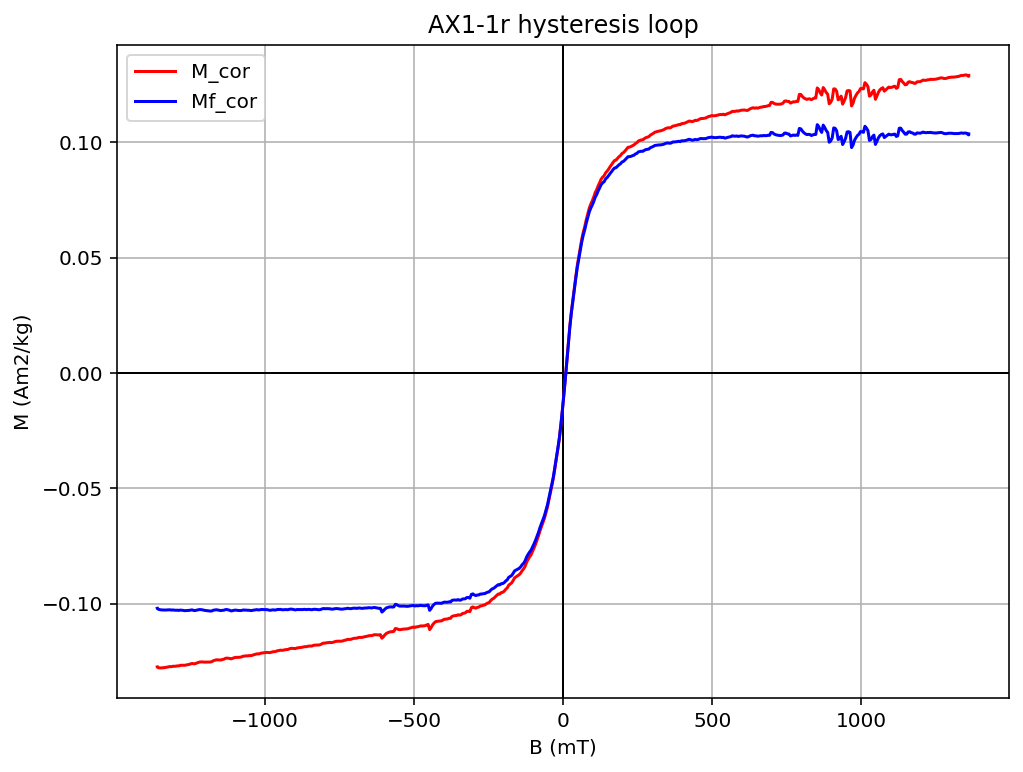

In [11]:
plot_hyst_data(hysteresis_measurements, 0, savefig = False)

### AX3

/Users/yimingzhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


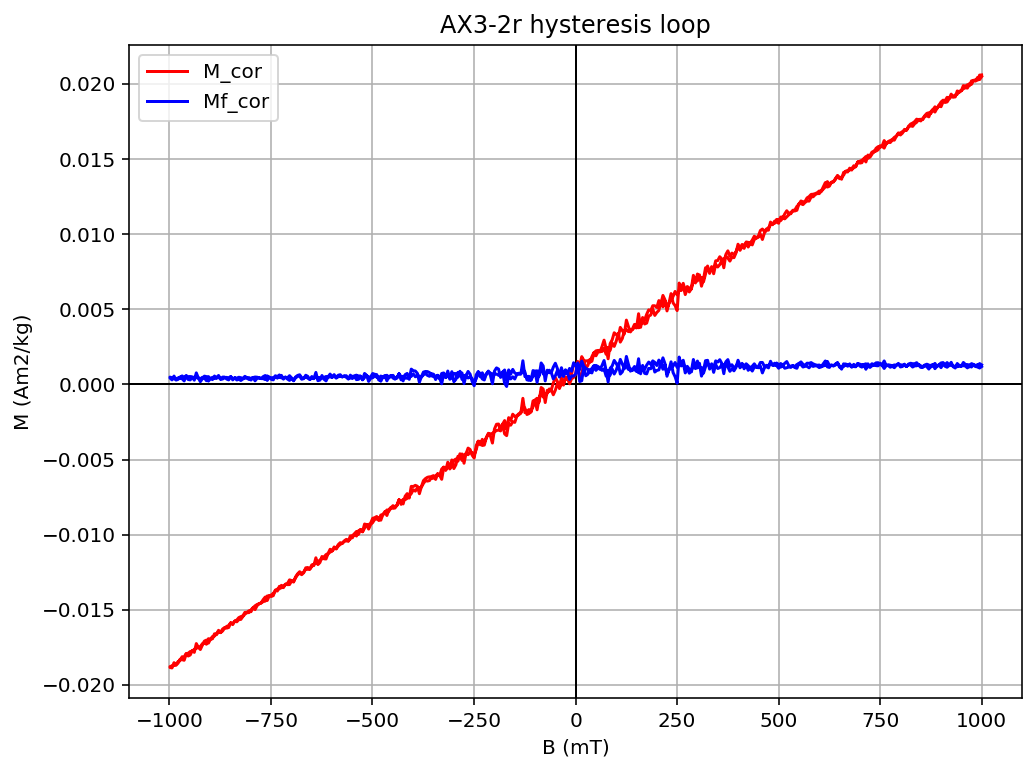

In [6]:
plot_hyst_data(hysteresis_measurements, 16, savefig = False)

### AX5

/Users/yimingzhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


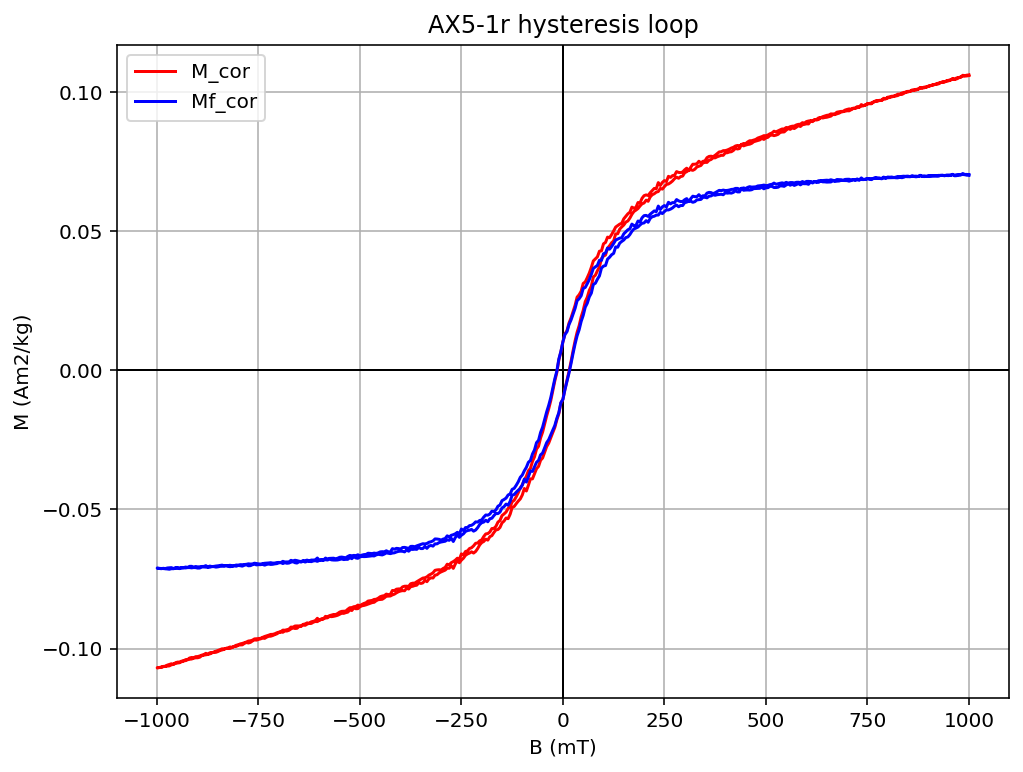

In [7]:
plot_hyst_data(hysteresis_measurements, 18, savefig = False)

### AX6

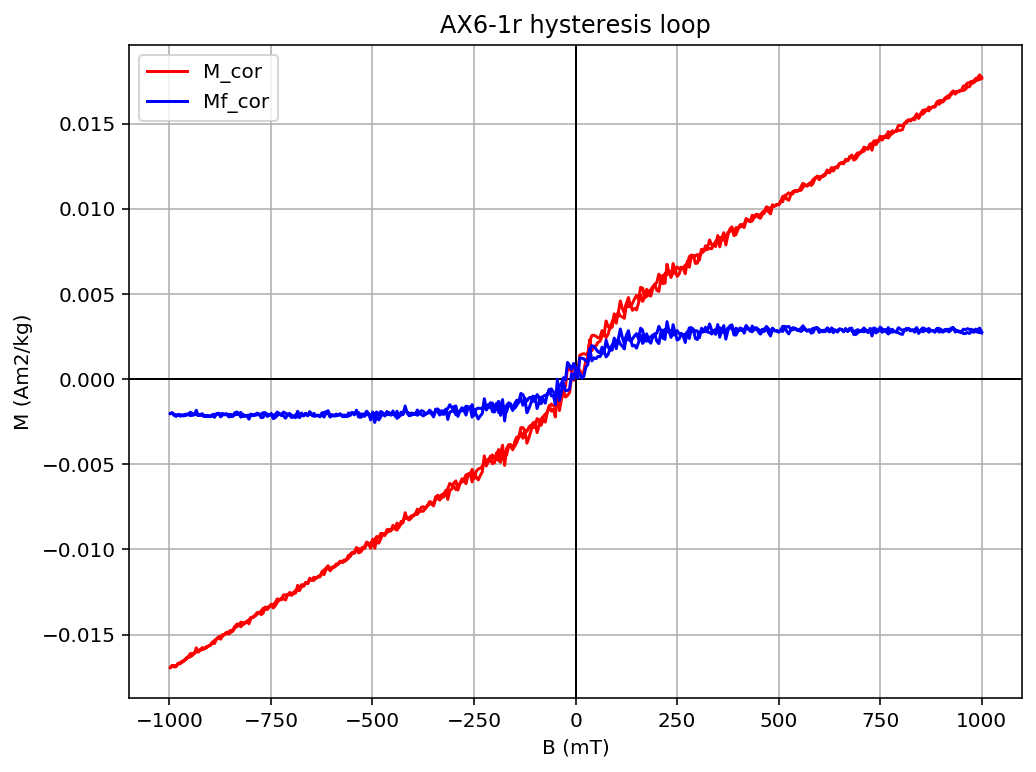

In [8]:
plot_hyst_data(hysteresis_measurements, 19, savefig = False)

### AX7

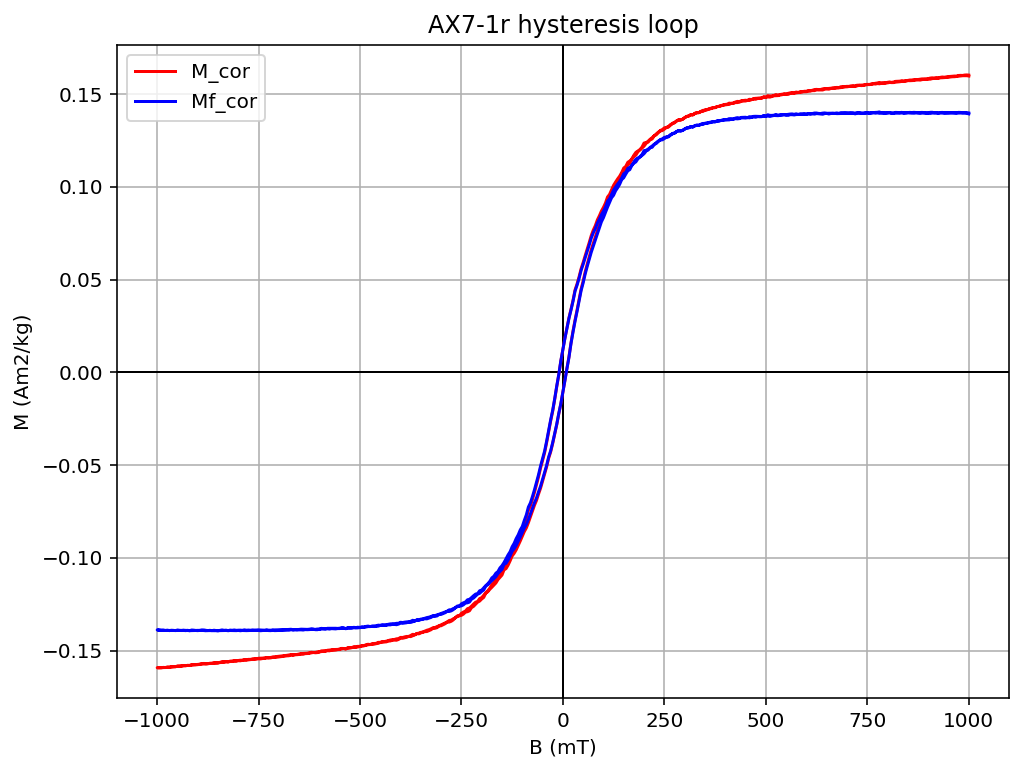

In [9]:
plot_hyst_data(hysteresis_measurements, 20, savefig = False)

### AX8

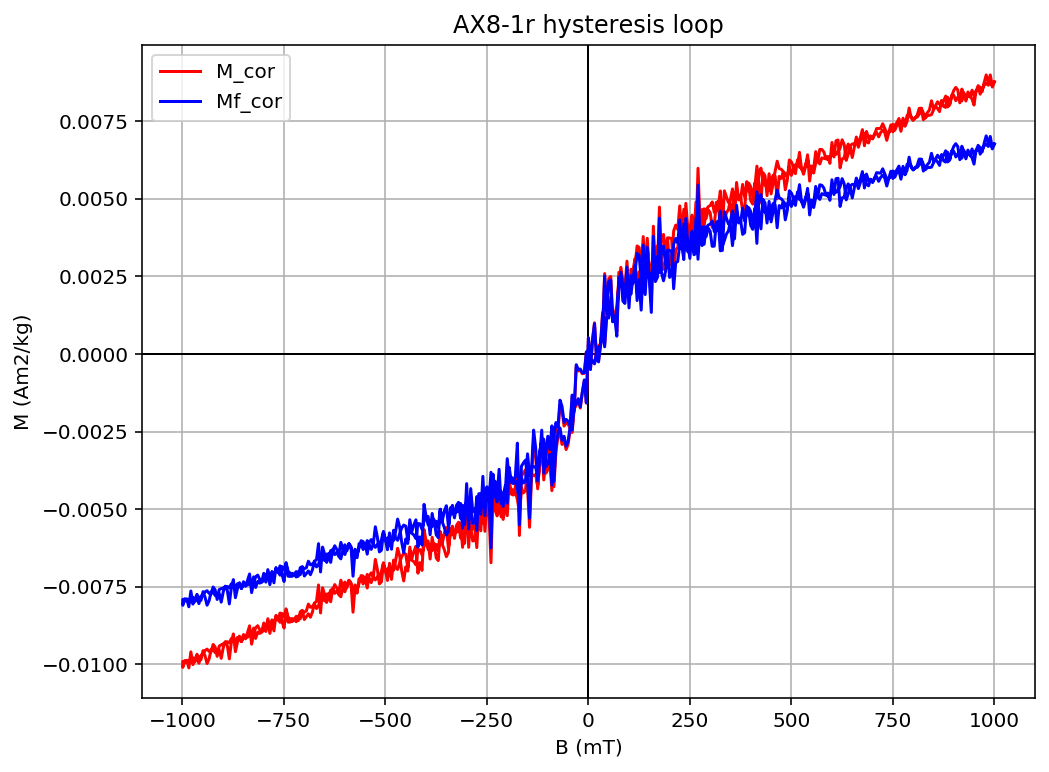

In [10]:
plot_hyst_data(hysteresis_measurements, 21, savefig = False)

### AX9

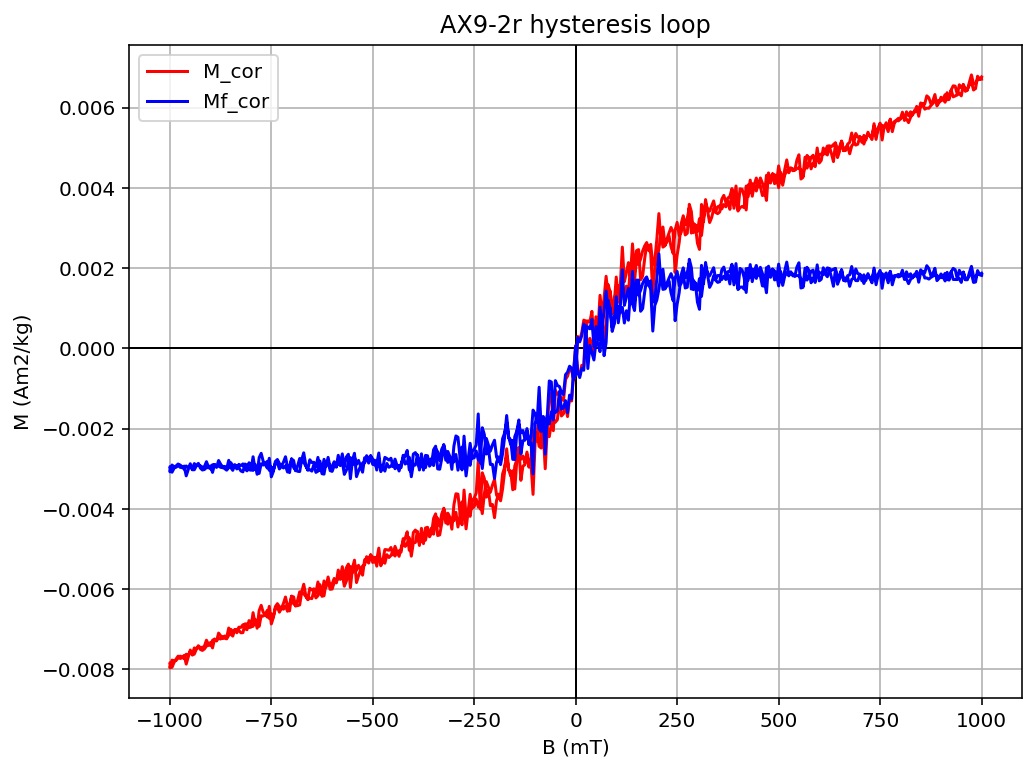

In [11]:
plot_hyst_data(hysteresis_measurements, 22, savefig = False)

### AX10

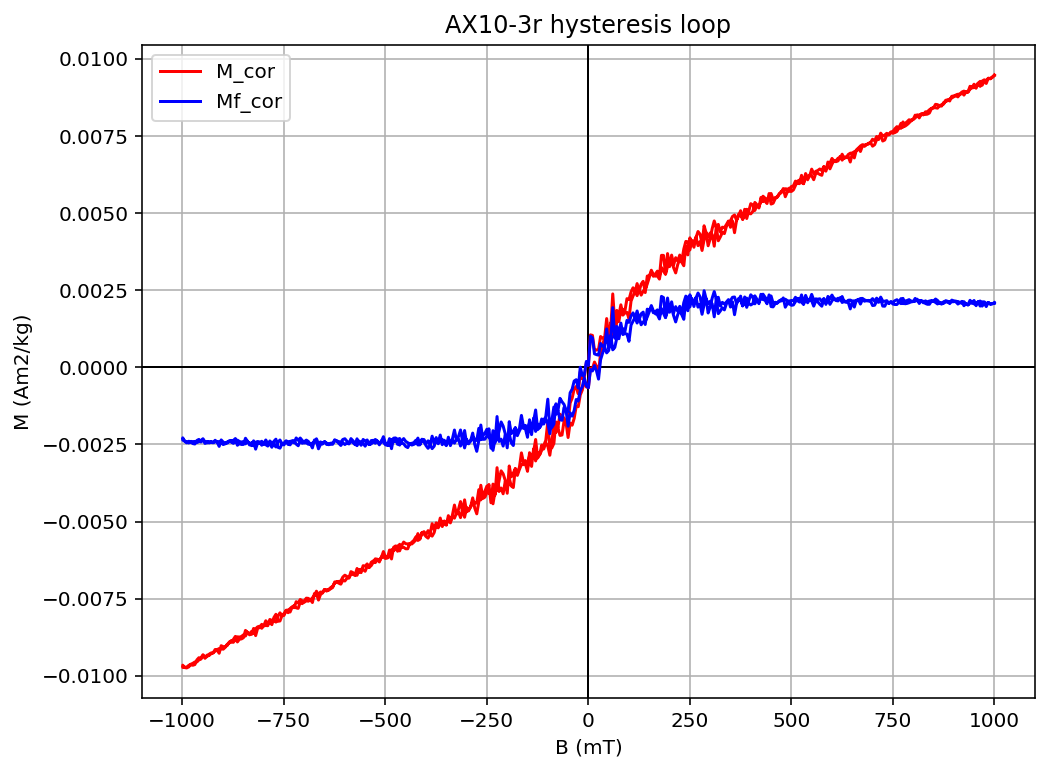

In [12]:
plot_hyst_data(hysteresis_measurements, 3, savefig = False)

### AX11

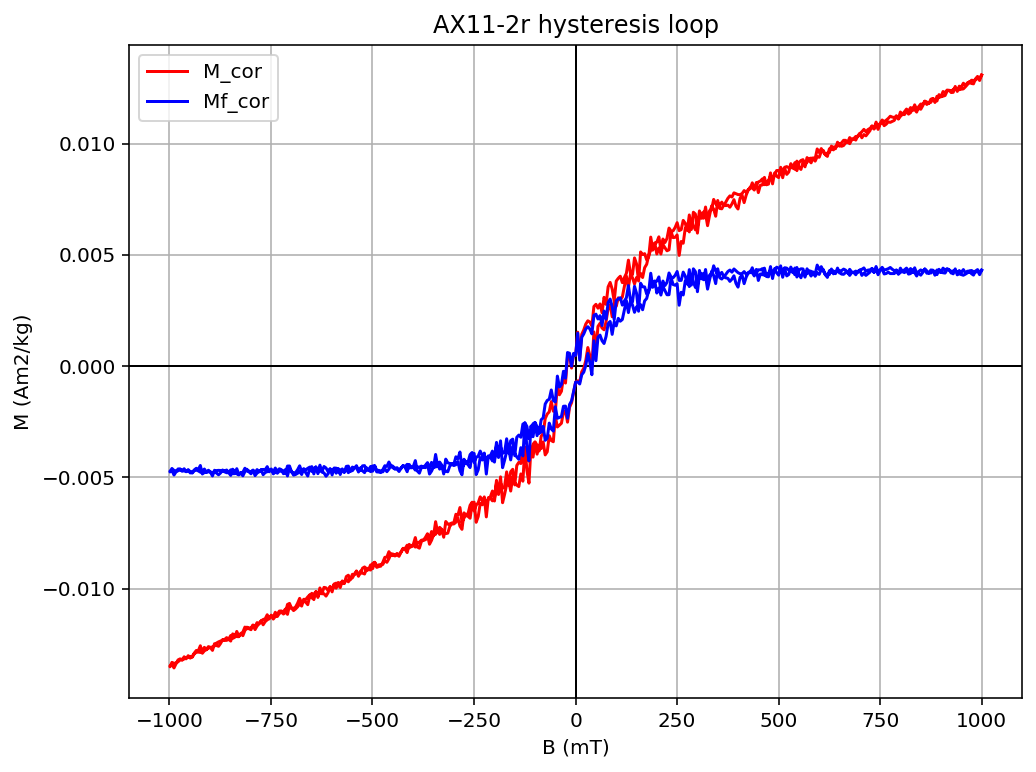

In [13]:
plot_hyst_data(hysteresis_measurements, 4, savefig = False)

### AX12

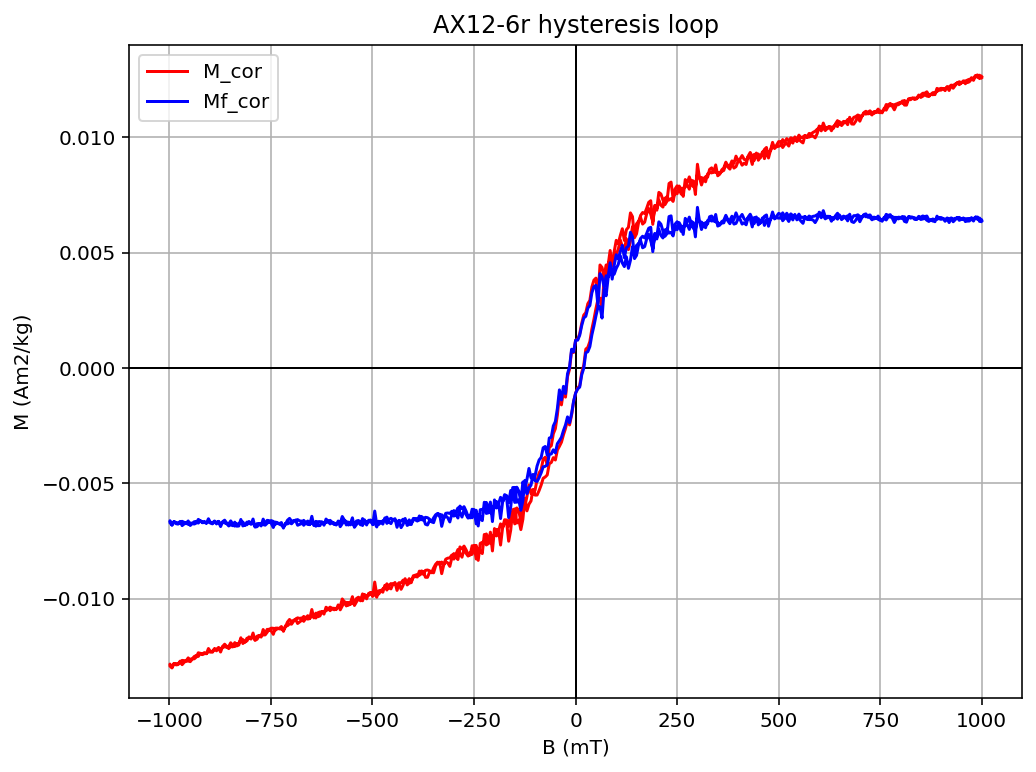

In [14]:
plot_hyst_data(hysteresis_measurements, 5, savefig = False)

### AX13

/Users/yimingzhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


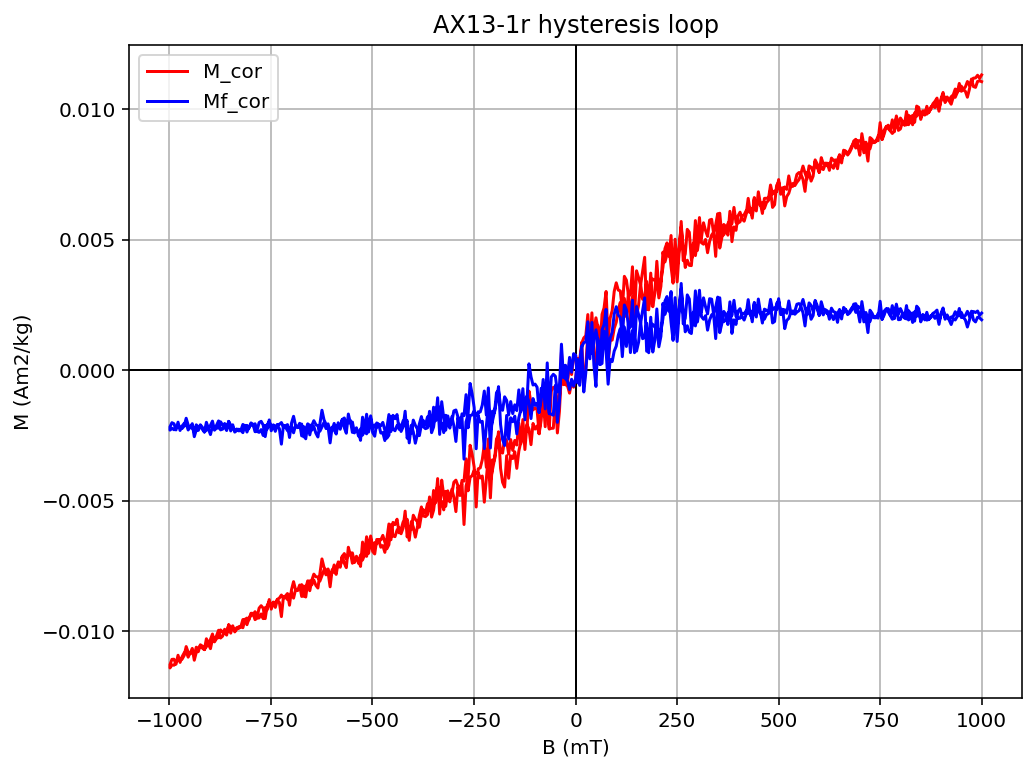

In [15]:
plot_hyst_data(hysteresis_measurements, 6, savefig = False)

### AX15

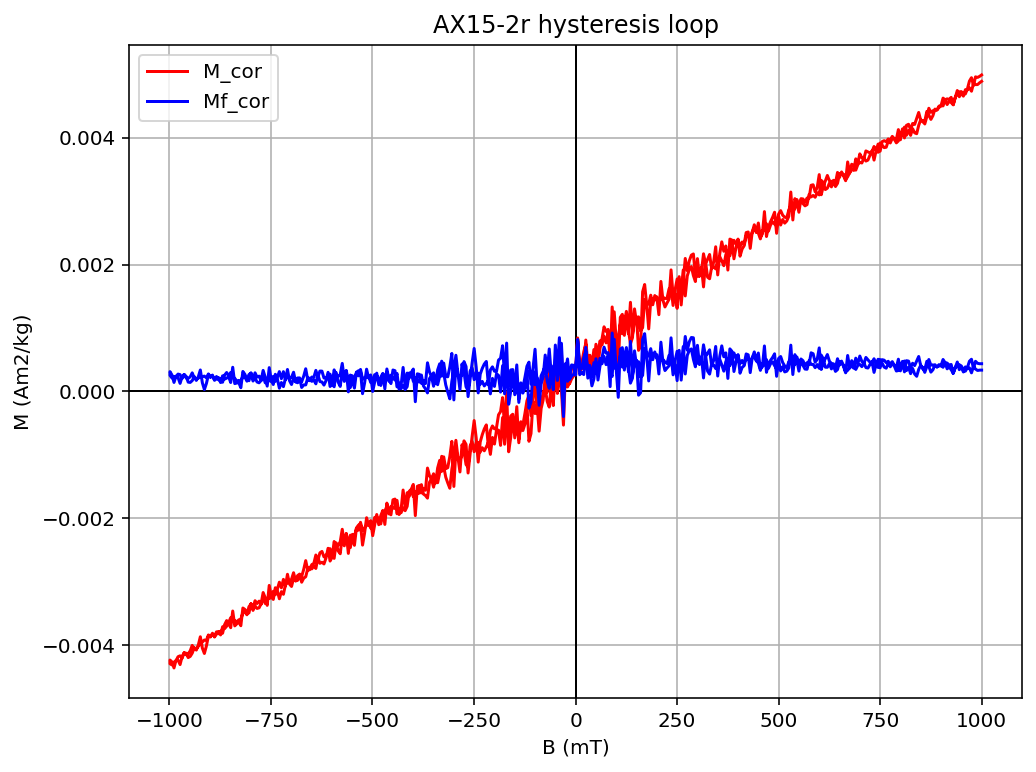

In [16]:
plot_hyst_data(hysteresis_measurements, 8, savefig = False)

### AX16

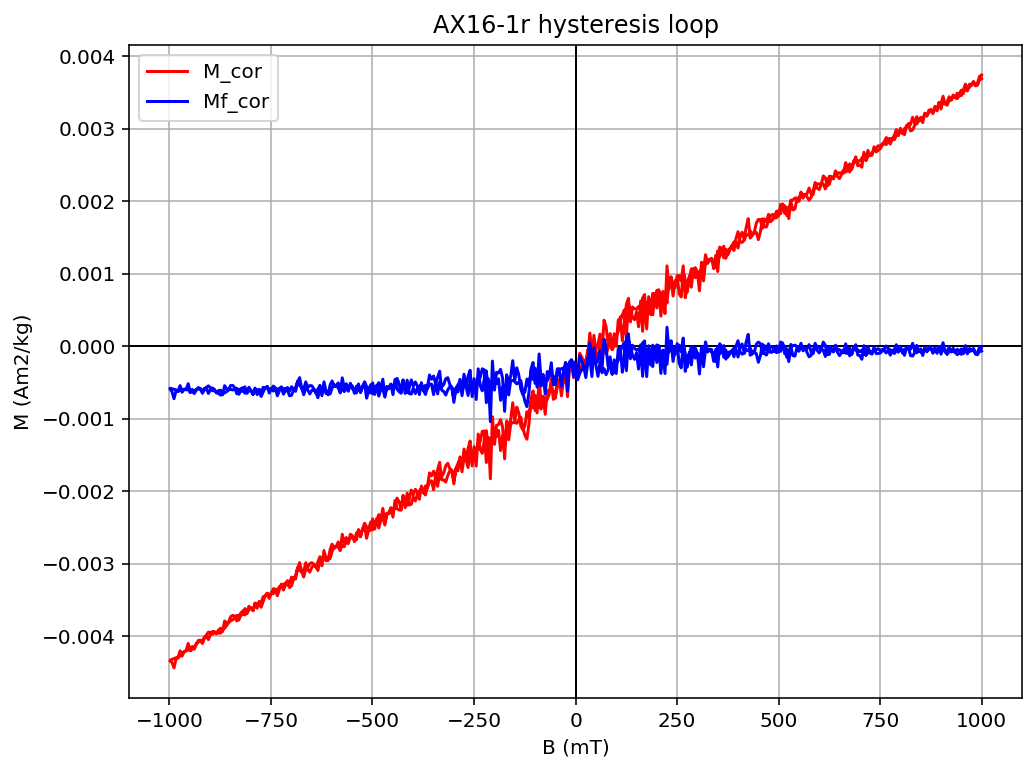

In [17]:
plot_hyst_data(hysteresis_measurements, 9, savefig = False)

### BD2

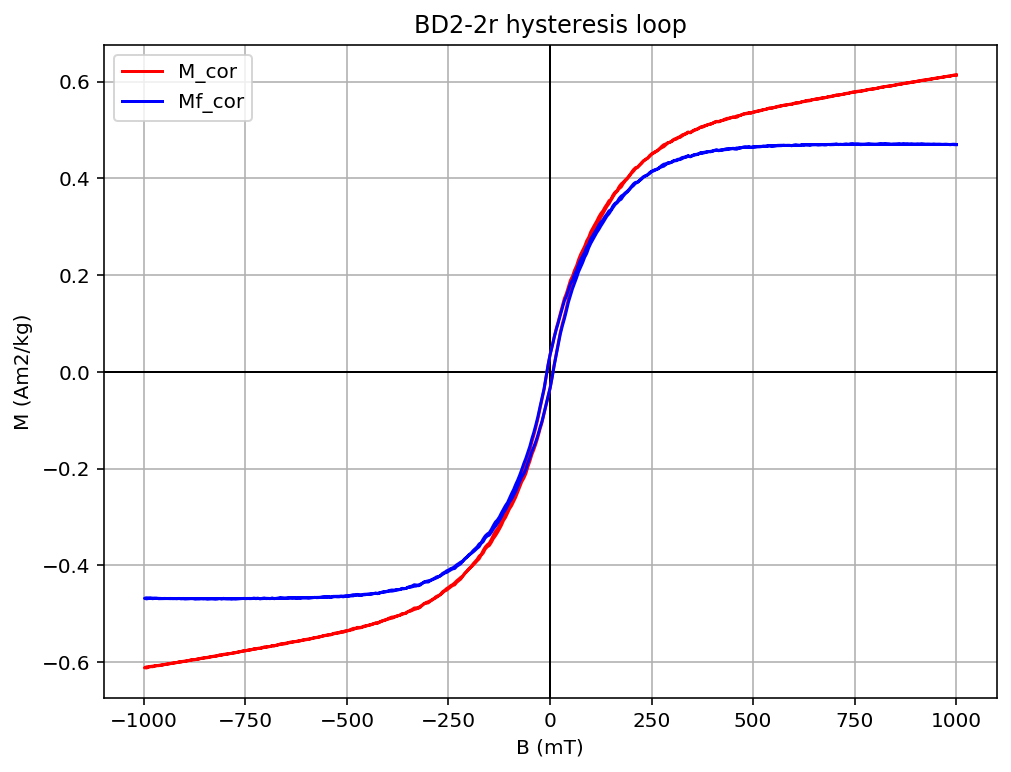

In [18]:
plot_hyst_data(hysteresis_measurements, 24, savefig = False)